In [312]:
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import math
import datetime
from dateutil.relativedelta import relativedelta

In [345]:
start_date = datetime.date(2021, 1, 1)
test_duration = 30
simulations = 1000

In [346]:
def EstimateReturns(initial_invest, expected_returns, std_dev, start_date, duration, monthly_con):
    final_money = []
    monthcount = []
        
     
    for month in range(duration*12):
        this_return = np.random.normal(expected_returns,std_dev)
        final_money.append(initial_invest)
        initial_invest = (initial_invest * (1+this_return)) + monthly_con
        a_date = (start_date + relativedelta(months=month))
        monthcount.append(a_date.strftime('%Y-%m'))  
    
    d = {'Date' : monthcount, 'Available Funds' : final_money}
    df = pd.DataFrame(data = d)
    final_funds.append(final_money[-1])
    return(df)

In [347]:
monthcount = []

for month in range(test_duration*12):
    a_date = (start_date + relativedelta(months=month))
    monthcount.append(a_date.strftime('%Y-%m')) 

tdf = pd.DataFrame({"Date" : monthcount}) 

In [348]:
weights = np.zeros(3)
weights[0] = 0.6
weights[1] = 0.2
weights[2] = 0.2

In [349]:
final_funds = []

for i in range(simulations):
    Stock1 = EstimateReturns(10000, 0.00685, 0.034, datetime.date(2021, 1, 1), test_duration, 1000)
    Stock2 = EstimateReturns(10000, 0.00109, 0.0509, datetime.date(2021, 1, 1), test_duration, 1000)
    Stock3 = EstimateReturns(10000, 0.0015, 0.0184, datetime.date(2021, 1, 1), test_duration, 1000)
    Stocks_total = pd.merge(Stock1,Stock2,how='left',on='Date')
    Stocks_total = pd.merge(Stocks_total,Stock3,how='left',on='Date')
    Stocks_total = Stocks_total.rename(columns={"Available Funds_x" : "SP500", "Available Funds_y" : "STI", "Available Funds" : "EIMI"})
    Stocks_total['Portfolio_Value {}'.format(i)] = Stocks_total['SP500']*weights[0] + Stocks_total['STI']*weights[1] + Stocks_total['EIMI']*weights[2]
    tdf = pd.merge(tdf,Stocks_total[['Date','Portfolio_Value {}'.format(i)]],on='Date', how='left')

tryy = tdf.T

In [355]:
# bp1 (801010), bp2 (802000)
bp3 = tryy.iloc[1:,-1].tolist() 
labels = ['80/10/10 Portfolio','80/20/0 Portfolio']

my_dict = {'80/10/10 Port': bp1, '80/20/0 Port': bp2, '60/20/20 Port': bp3}

Text(0.5, 1.0, 'Comparison of different portfolio weights')

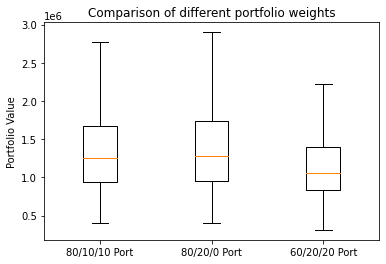

In [356]:
fig, ax = plt.subplots()
ax.boxplot(my_dict.values(), showfliers=False)
ax.set_xticklabels(my_dict.keys())
plt.ylabel("Portfolio Value")
plt.title("Comparison of different portfolio weights")

In [350]:
quantiles = []
for i in [0.25,0.5,0.75]:
    indx = str(tryy[tryy[tryy.shape[1]-1]==float(tryy.iloc[1:,tryy.shape[1]-1].quantile([i], interpolation = 'higher'))].index.tolist()).strip("[], '")
    quantiles.append(indx)

color=['y','r','b']
lab=['25th Percentile', 'Median', '75th Percentile']

In [351]:
monthcount = []

for month in range(test_duration*12):
    a_date = (start_date + relativedelta(months=month))
    monthcount.append(a_date.strftime('%Y-%m')) 

tdff = pd.DataFrame({"Date" : monthcount}) 

final_money = []
monthcount = []
initial_invest = 10000

for month in range(test_duration*12):
    final_money.append(initial_invest)
    initial_invest = (initial_invest + 1000)
    a_date = (start_date + relativedelta(months=month))
    monthcount.append(a_date.strftime('%Y-%m'))  

d = {'Date' : monthcount, 'Available Funds' : final_money}
savings = pd.DataFrame(data = d)
savings
savings = pd.merge(tdff,savings,on='Date', how='left')

No handles with labels found to put in legend.
The median portfolio value is: 1061471.72
The 75th percentile portfolio value is: 1396534.68
The 25th percentile portfolio value is: 832125.08
The savings portfolio value is: 369000


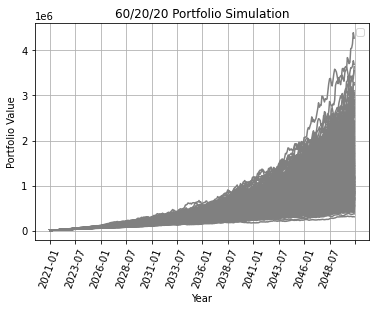

In [359]:
labels = []
fig, ax = plt.subplots()
for i in range(1, len(tryy)):
    ax.plot(tryy.iloc[0,:], tryy.iloc[i,:], color='grey')
    labels.append("Portfolio No: {}".format(i))

for i in range(0,len(quantiles)): 
    ax.plot(tryy.iloc[0,:], tryy.loc[quantiles[i],:], color=color[i], label=lab[i])

ax.plot(savings.iloc[:,0], savings['Available Funds'], color='purple', label="Savings")
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.setp(ax.get_xticklabels(), rotation=70, ha="center")
plt.ylabel("Portfolio Value")
plt.xlabel("Year")
plt.title("60/20/20 Portfolio Simulation")
plt.grid()
leg = ax.legend()

print("The median portfolio value is: {}".format(round(tryy.iloc[1:,tryy.shape[1]-1].median(),2)))
print("The 75th percentile portfolio value is: {}".format(round(float(tryy.iloc[1:,tryy.shape[1]-1].quantile([0.75])),2)))
print("The 25th percentile portfolio value is: {}".format(round(float(tryy.iloc[1:,tryy.shape[1]-1].quantile([0.25])),2)))
print("The savings portfolio value is: {}".format(round(float(savings.iloc[-1,1]))))

In [115]:
alist = list(tryy.iloc[1:,119].astype(int) > 800000)
output = [idx for idx, element in enumerate(alist) if element == True]
print(output)

[9, 58, 73, 164]


In [107]:
tryy = tryy.drop(['Portfolio_Value 9','Portfolio_Value 58','Portfolio_Value 9','Portfolio_Value 9', ], axis=0)

In [9]:
weights = np.random.random(3)
weights /= np.sum(weights)
weights

array([0.43873031, 0.26124055, 0.30002914])